In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
data = pd.read_csv("./data/breastCancer.csv")

In [4]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data pre-processing

In [5]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [6]:
data.shape

(699, 11)

In [7]:
data.dtypes #bare_nucleoli contains some character other than value 
            # that is why it shows object type

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [8]:
data.iloc[0:100, :]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [9]:
data[data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [10]:
digit_or_not_bare_nucleoli = pd.DataFrame(data.bare_nucleoli.str.isdigit())

In [11]:
digit_or_not_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [12]:
data[data['bare_nucleoli']=='?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [13]:
df = data.replace('?',np.nan) # python understands nan therefore we are replacing it

In [14]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [15]:
df = df.fillna(df.median())

In [16]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [17]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [18]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [19]:
df.iloc[0:25, :]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [20]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

## Exploratory analysis

In [21]:
df.drop('id', axis=1, inplace=True) # id is not giving any useful information 

In [22]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [23]:
df.describe().T # Standard deviation looks pretty uniform 

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


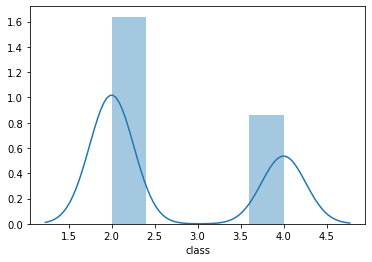

In [24]:
sns.distplot(df['class'])

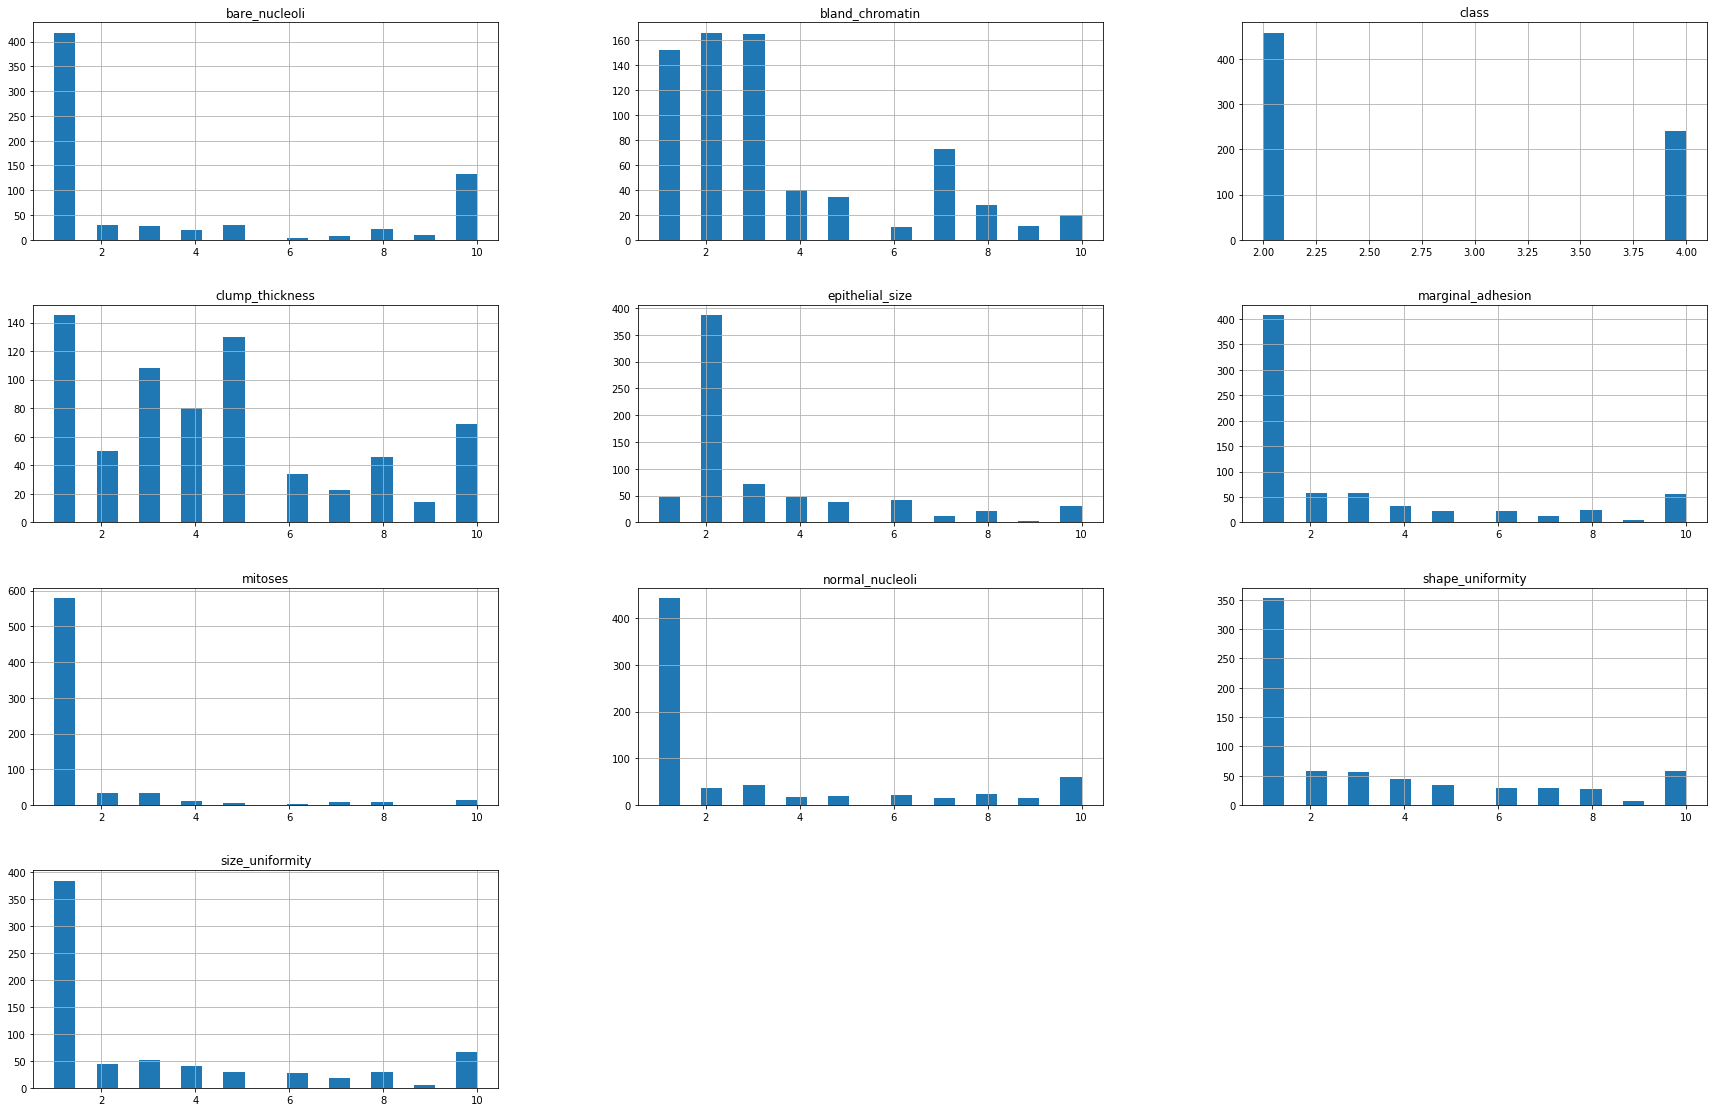

In [25]:
df.hist(figsize=(30,30), layout=(6,3), bins=20); #put semicolon to avoid text printing

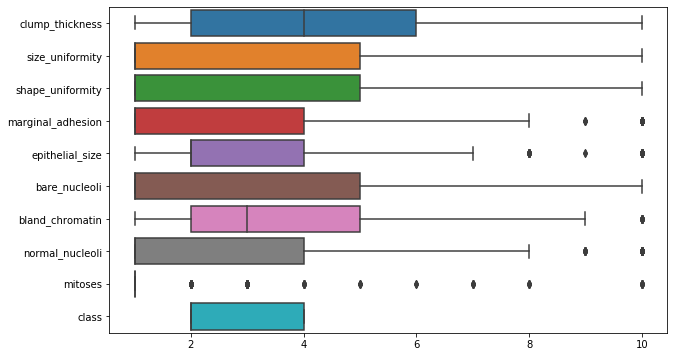

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient='h'); # There are not many outliers to deal with

In [27]:
df.corr()
#There is high correlation in between the variables. 
#We can deal with this using the concept of PCA in order not to run into multicollinearity

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


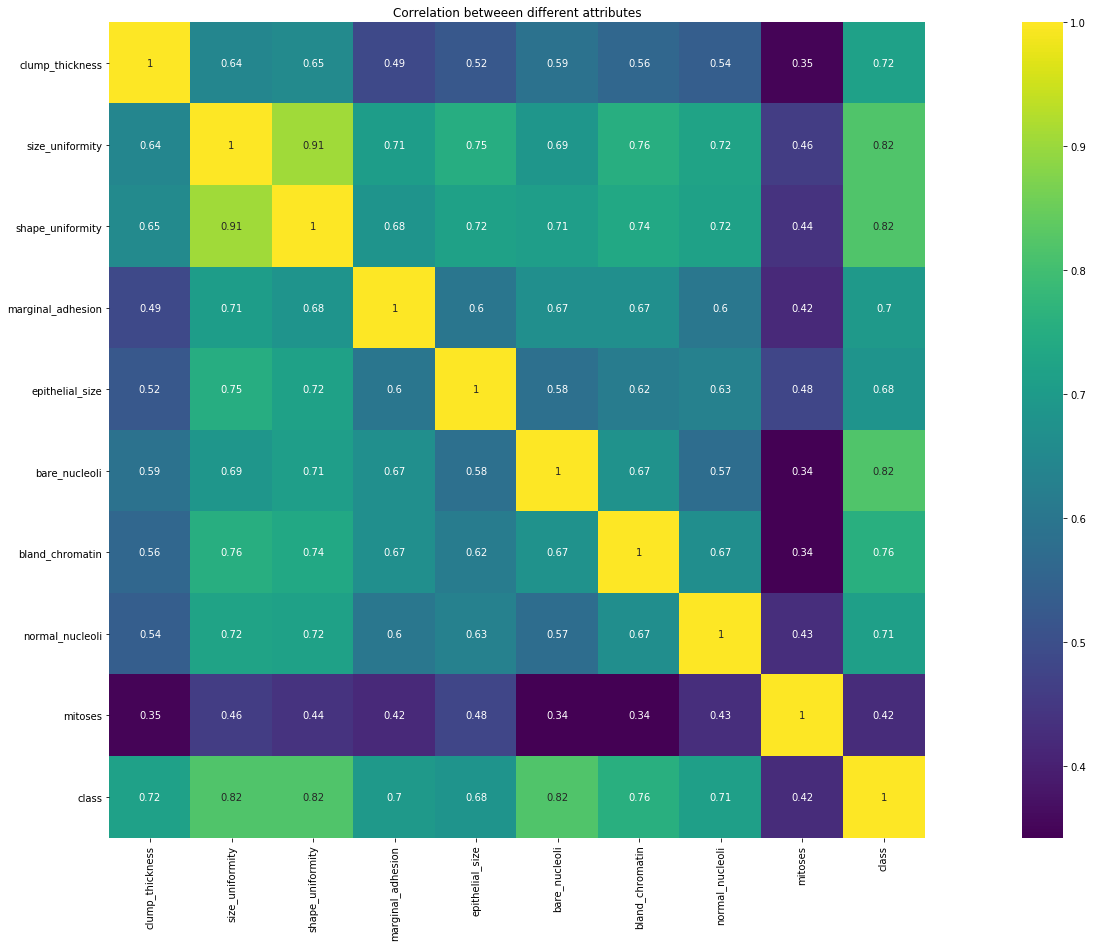

In [28]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis');
plt.title('Correlation betweeen different attributes')
plt.show()

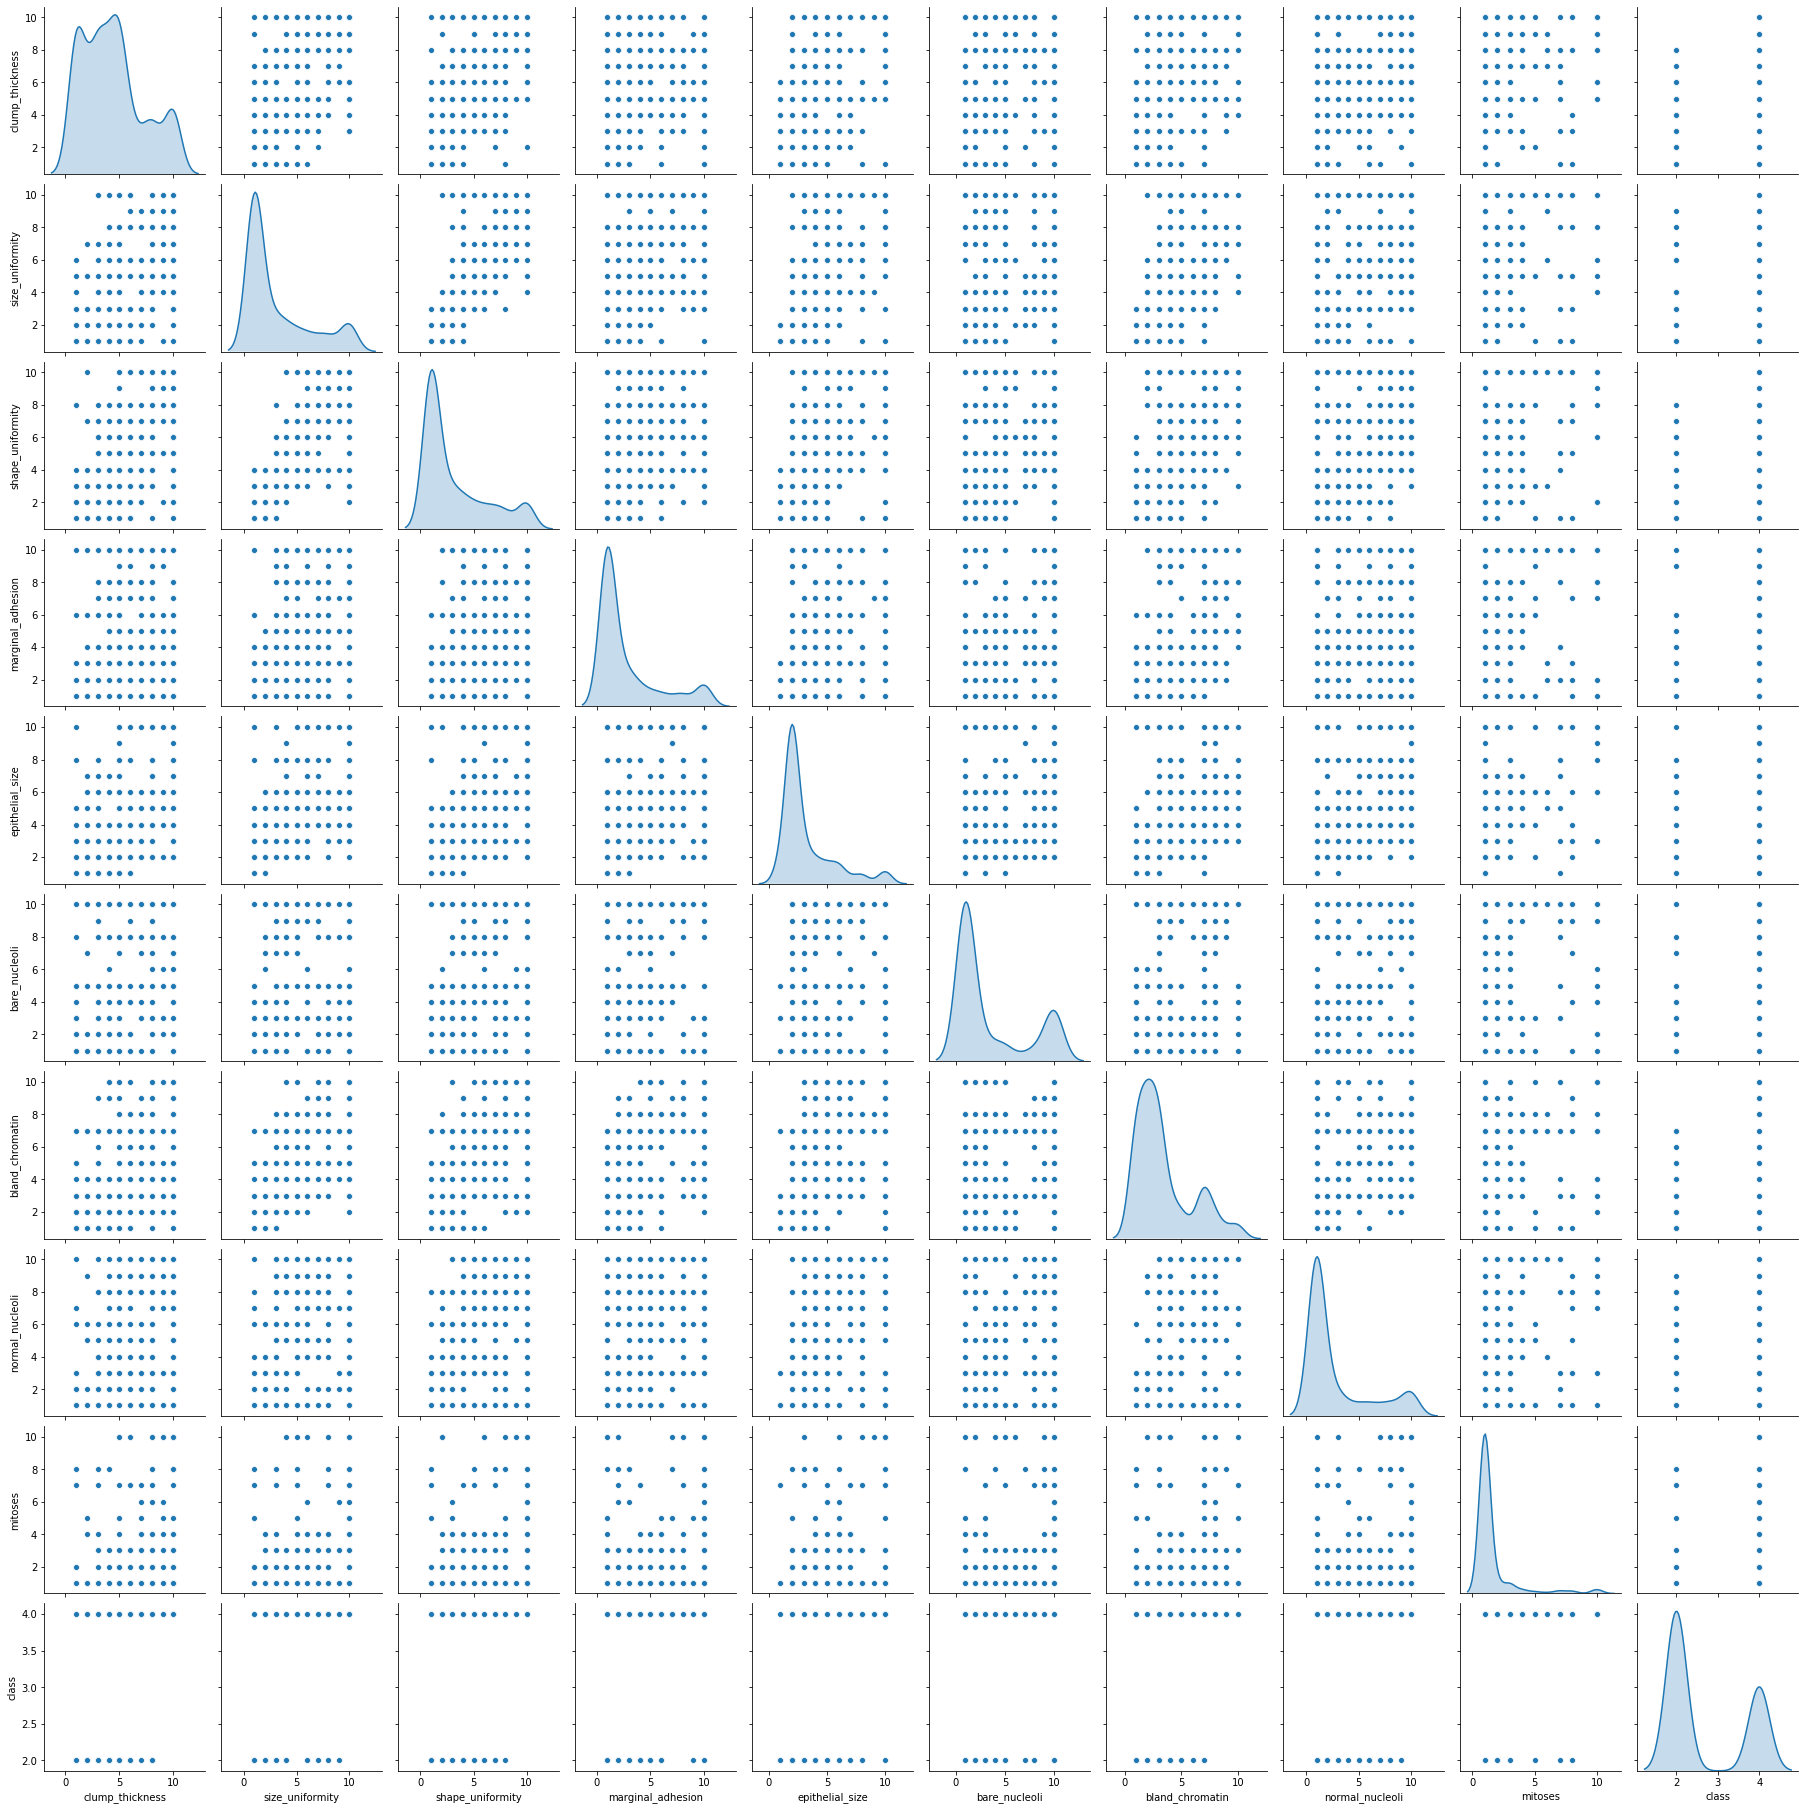

In [29]:
sns.pairplot(df, diag_kind='kde');

## Building model

In [30]:
X = df.drop('class', axis=1)
y = df['class']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [33]:
KNN.fit(X_train, y_train);

In [34]:
KNN.score(X_test, y_test)*100

97.14285714285714

In [35]:
predicted_1 = KNN.predict(X_test)

In [36]:
from scipy.stats import zscore

print('KNeighborsClassifier prdiction {0:.2g}%'.format(KNN.score(X_test, y_test)*100))

KNeighborsClassifier prdiction 97%


In [37]:
from sklearn.svm import SVC


svc= SVC(gamma=0.025, C=3)
svc.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
predicted_2 = svc.predict(X_test)

In [39]:
print('SupportVectorClassifier Agorithm is predicting at {0:.2g}%'.format(svc.score(X_test, y_test)*100))

SupportVectorClassifier Agorithm is predicting at 98%


In [40]:
knnPredictions=pd.DataFrame(predicted_1)
svcPredictions=pd.DataFrame(predicted_2)

In [41]:
df1=pd.concat([knnPredictions,svcPredictions],axis=1)

In [42]:
df1.columns=[['knnPredictions','svcPredictions']]

In [43]:
df1

,knnPredictions,svcPredictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,2


In [44]:
from sklearn.metrics import classification_report

print("classification_report for KNN")

print("..."*10)

print(classification_report(y_test, predicted_1))

classification_report for KNN
..............................
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



Confusion Matrix For KNeighborsClassifier


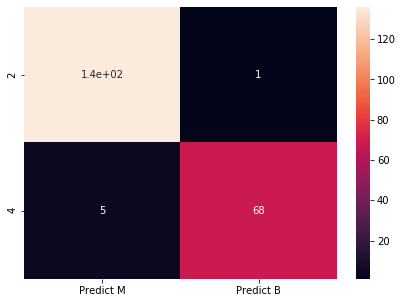

In [45]:
from sklearn import metrics

print("Confusion Matrix For KNeighborsClassifier")
cm=metrics.confusion_matrix(y_test, predicted_1, labels=[2, 4])

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [46]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['Predict_Type'] = test_predict.astype(int)
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct
sub.head(10)

NameError: name 'test_id' is not defined

In [ ]:
sub[['id','Predict_Type']].to_csv('submission.csv',index=False)

In [54]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=24) # using the random state for reproducibility
forest= RandomForestClassifier(random_state=24)
knn= KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
svm= SVC(random_state=24)
xboost= XGBClassifier(random_state=24)

# now, create a list with the objects 
models= [tree, forest, knn, svm, xboost]

In [62]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
seed = 7


for model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(type(model).__name__)
	msg = "%s: %f (%f)" % (type(model).__name__, cv_results.mean(), cv_results.std())
	print(msg)

DecisionTreeClassifier: 0.927122 (0.052447)
RandomForestClassifier: 0.964265 (0.036827)
KNeighborsClassifier: 0.965673 (0.041497)
SVC: 0.961408 (0.037267)
XGBClassifier: 0.955694 (0.041610)


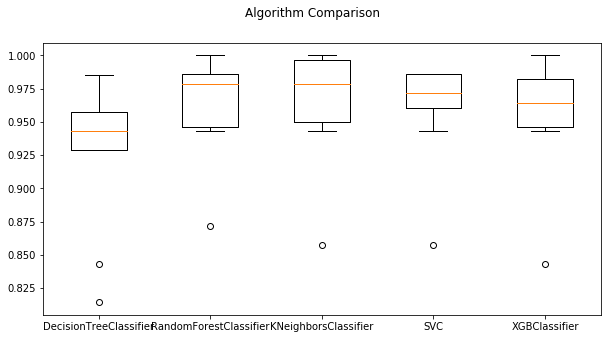

In [60]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=24) # using the random state for reproducibility
forest= RandomForestClassifier(random_state=24)
knn= KNeighborsClassifier()
svm= SVC(random_state=24)
xboost= XGBClassifier(random_state=24)

# now, create a list with the objects 
models= [tree, forest, knn, svm, xboost]

for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

In [ ]:
# the libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# separating data into training and test
X= train.drop('Cover_Type', axis=1) # cover_type is our target feature, which has 7 classes
y= train['Cover_Type']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25)


In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()